# Plotting Running the nonadiabatic molecular dynamics (NA-MD)

In this tutorial, we perform NA-MD using the NACs computed in [step3](../../8_step3_cp2k/2_xTB). After the dynamic is done, we will fit the data using a stretched-compressed exponential function. We only do the dynamics for the NACs computed for the system in the xTB framework. The reason is that doing the NA-MD for the other system we considered with DFT, the rutile-$TiO_2$ unit cell, is exactly the same as below and you just need to modify some parameters as is explained in the [README.md](README.md) file. 

## Table of contents
<a name="toc"></a>
1. [Importing needed libraries](#import)
2. [Overview of required files](#required_files)
3. [Defining the functions and variables](#def_fun_var)
4. [Run the dynamics](#run_dyn) 
5. [Decoherence times](#deco_times)
6. [Fitting data](#fit_data)

### A. Learning objectives

* To be able to run the NA-MD using Libra
* To be able to compute the decoherence times
* To be able to compute the average NA-MD timescales

### B. Use cases

* [Run the dynamics](#run_dyn)
* [Decoherence times](#deco_times)
* [Fitting data](#fit_data)


### C. Functions

- `libra_py`
  - `data_conv`
  - `data_stat`
  - `data_outs`
  - `data_read`
  - `workflows`
    - `nbra`
      - [`step4`](#run_dyn)
        - [`namd_workflow`](#run_dyn)
      - [`decoherence_times`](#deco_times)
        - [`decoherence_times`](#deco_times)
  - `units`
    - `fs2au`
    


## 1. Importing needed libraries <a name="import"></a>
[Back to TOC](#toc)

Since the data are stored in sparse format using `scipy.sparse` library, we need to load this library to read them. Import `numpy`, `scipy.sparse`, `data_conv`, `data_outs`, `data_stat`, `data_io`, `units`, and `step4` modules and also the `ann` for doing the NA-MD using artificial neural netwrok (we do not cover this in here). Also, `multiprocessing` library will be needed to simultaneously run the NA-MD in different batches.
The `scipy.optimize.curve_fit` will be used to fit the data and plot them using `matplotlib`.

In [1]:
import os
import sys
import math
import time
import glob 

import multiprocessing as mp
import numpy as np
import scipy.sparse as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

from liblibra_core import *
import util.libutil as comn
from libra_py import units as units
from libra_py import data_conv, data_stat, data_outs, data_read
import libra_py.workflows.nbra.decoherence_times as decoherence_times
import libra_py.workflows.nbra.step4 as step4
import libra_py.workflows.nbra.ann as ann

/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<float,

## 2. Overview of required files <a name="required_files"></a>
[Back to TOC](#toc)

The only files that we need are the NACs obtained in [this tutorial](../../8_step3_cp2k/2_xTB/res-mixed-basis).

The `inputs.tar.bz2` archive is the `data.tar.bz2` archive from that tutorial. 

We only need to unpack it:

    tar -xjf inputs.tar.bz2

## 3. Defining the functions and variables <a name="def_fun_var"></a>
[Back to TOC](#toc)

The helper functions are used in here. We will set the parameters in here. The list of all parameters are completely explained in the [README.md](README.md) file.

## 5. Decoherence times <a name="deco_times"></a>
[Back to TOC](#toc)

We have computed the average decoherence times between pairs of states when we ran the dynamics in the last cell in `average_decoherence.txt` file. Now, we load and plot it using `plt.imshow`.

## 6. Fitting data <a name="fit_data"></a>
[Back to TOC](#toc)


After the dynamic is done, we load all the NA-MD results, stored in `SH_pop.txt` files, using `np.loadtxt` and start fitting them to a stretched-compressed exponential function of the form:

$$P(t; E_0)=\exp(-(\frac{t}{\tau})^\beta)$$


Then, the average time scale is computed for the fits that has an $R^2$ value more than $0.01$. The error bars are computed using the following formula:

$$\epsilon=Z\frac{s}{\sqrt{N}}$$

where $s$ is the stadard deviaton and $N$ is the number of samples (the ones that have $R^2$ value of more than $0.01$). The $Z$ value is the confidence interval coefficient which for confidence interval of $95\%$, a value of $1.96$ is chosen.

In the above, we have only considered, FSSH and IDA ad for simplicity, we will consider the decay dynamics of the hot state which is the 10th state. Also, please note that this is just an example and we want to show how the workflow is. So, we consider even lower $R^2$ value. For better and more accurate results, we need not only longer trajectory but also larger number of surface hopping trajectory.

------------FSSH----------
Folder = ./namd_regular/_start_s10_FSSH_batch0
tau: 55.8097275417135  beta: 1.9466556224447527  R2: 0.9935565031726641
Folder = ./namd_regular/_start_s10_FSSH_batch2
tau: 56.42476635344944  beta: 1.892159546378738  R2: 0.9912831306534666
Folder = ./namd_regular/_start_s10_FSSH_batch4
tau: 40.279552862685684  beta: 2.0690787517035094  R2: 0.9937909915658818
Folder = ./namd_regular/_start_s10_FSSH_batch6
tau: 45.424866082851274  beta: 2.0014545292280363  R2: 0.9904776565136276
Folder = ./namd_regular/_start_s10_FSSH_batch8
tau: 61.11790846422468  beta: 4.100637433061178  R2: 0.9881188299186705
Folder = ./namd_regular/_start_s10_FSSH_batch10
tau: 60.54917508561718  beta: 2.632048637211153  R2: 0.9916218599427604
Folder = ./namd_regular/_start_s10_FSSH_batch12
tau: 54.09183090887278  beta: 1.9109086473764463  R2: 0.9940645105285231
Folder = ./namd_regular/_start_s10_FSSH_batch14
tau: 46.318250561834944  beta: 2.0946249957645375  R2: 0.9810869799169216
Folder = ./

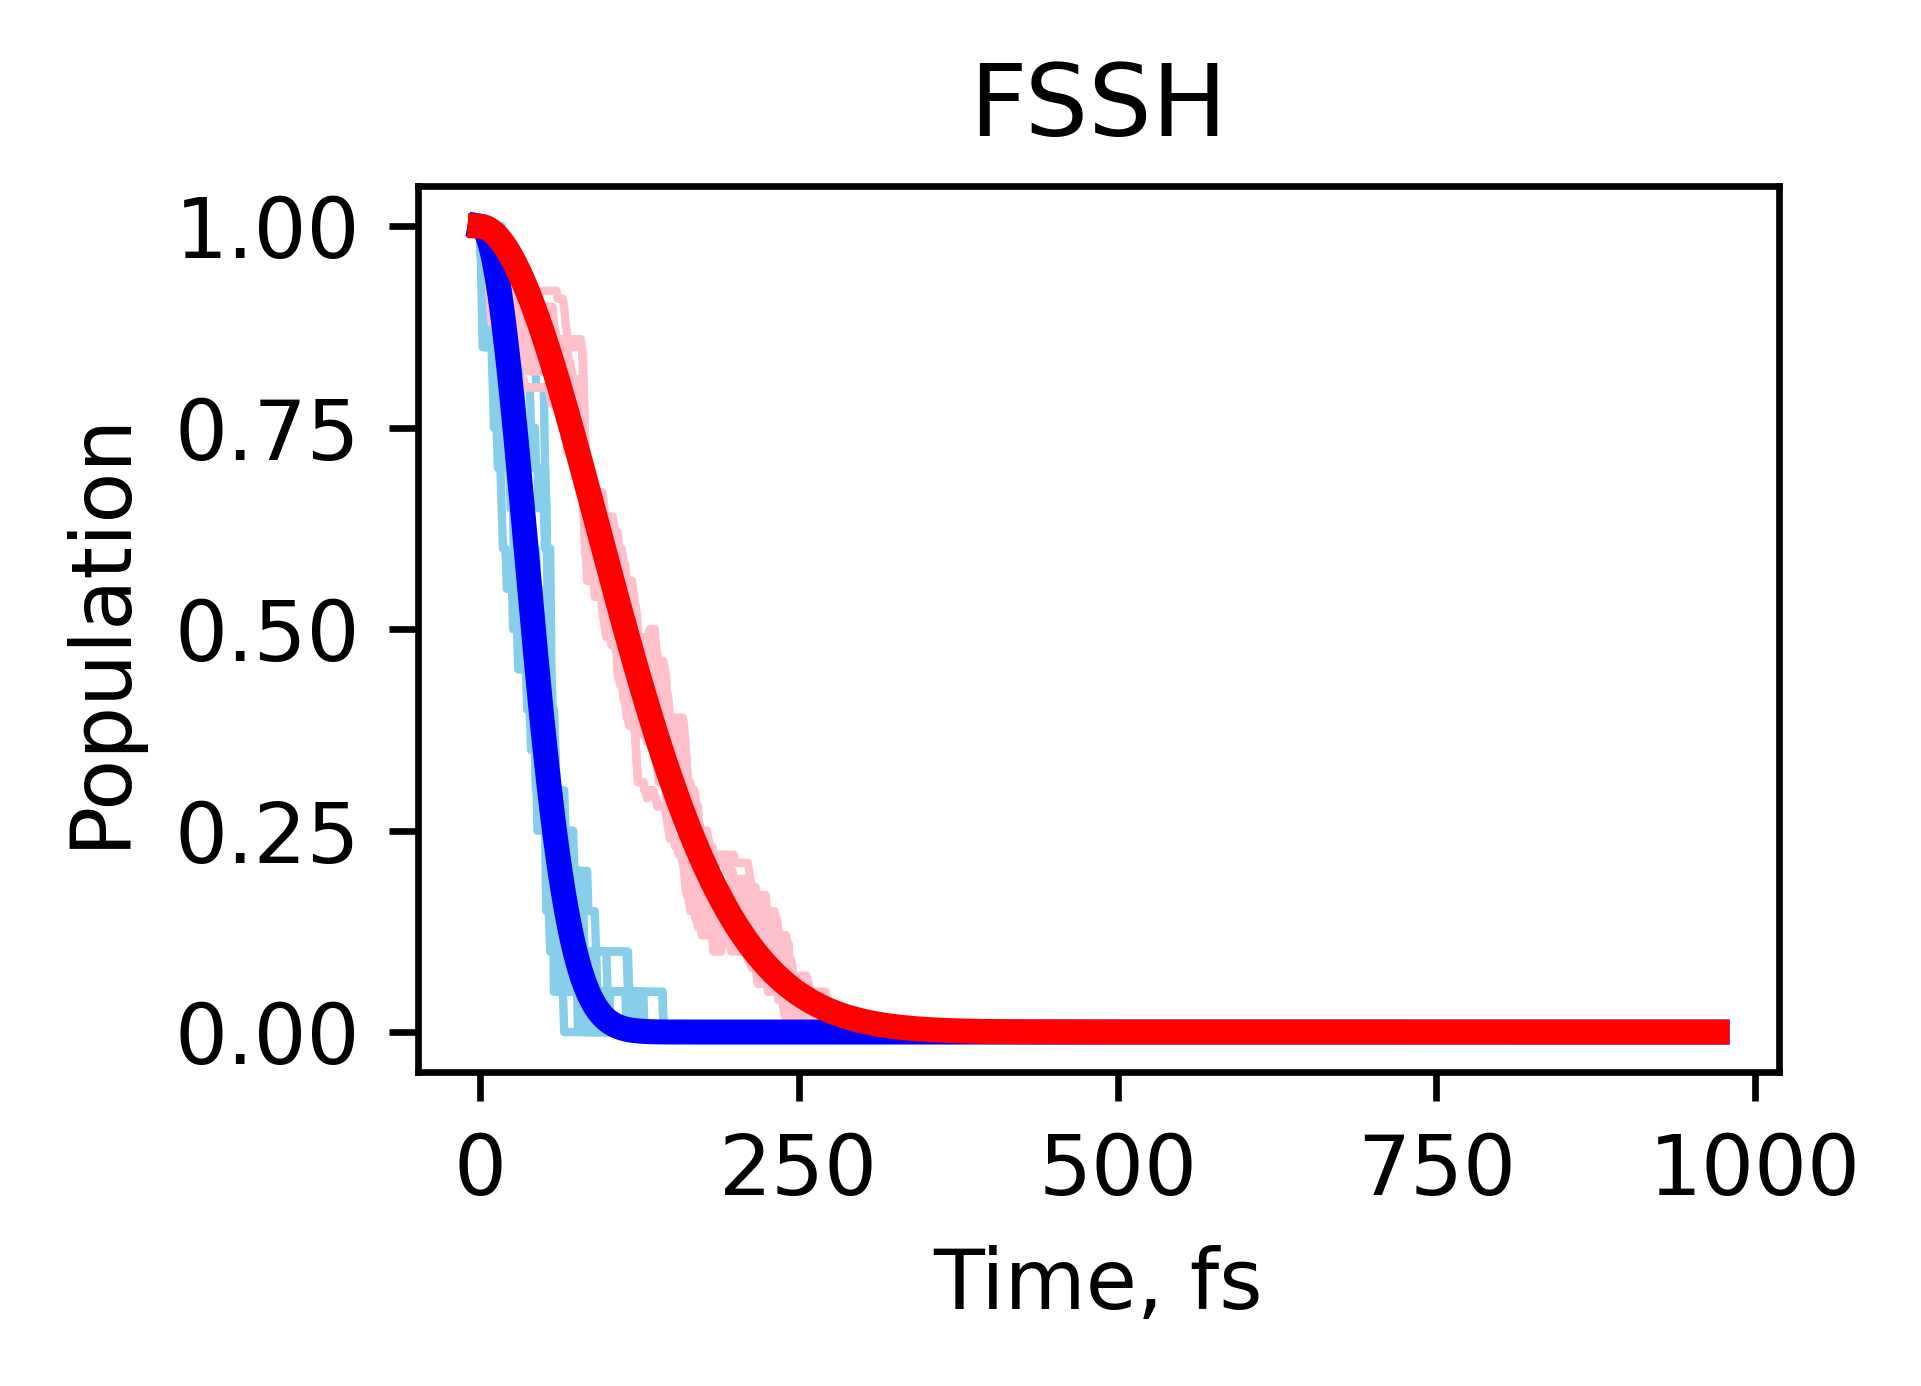

------------IDA----------
Folder = ./namd_regular/_start_s10_IDA_batch0
tau: 55.96501800430182  beta: 1.9937487017135551  R2: 0.9919385270040272
Folder = ./namd_regular/_start_s10_IDA_batch2
tau: 50.57772841137768  beta: 1.9552049662876978  R2: 0.9934058789285377
Folder = ./namd_regular/_start_s10_IDA_batch4
tau: 34.833737541024625  beta: 1.3052683031944732  R2: 0.9879911266867386
Folder = ./namd_regular/_start_s10_IDA_batch6
tau: 45.52751588290799  beta: 2.431156860914275  R2: 0.9898125579598983
Folder = ./namd_regular/_start_s10_IDA_batch8
tau: 55.26541365315358  beta: 2.878943422249965  R2: 0.9885129665699773
Folder = ./namd_regular/_start_s10_IDA_batch10
tau: 45.59784792898684  beta: 1.3993081236498555  R2: 0.9848535676857134
Folder = ./namd_regular/_start_s10_IDA_batch1
tau: 47.184180190993445  beta: 1.785322197745924  R2: 0.9798294125864023
Folder = ./namd_regular/_start_s10_IDA_batch3
tau: 41.83827264068966  beta: 1.7355194612344305  R2: 0.9885199362158317
Folder = ./namd_regula

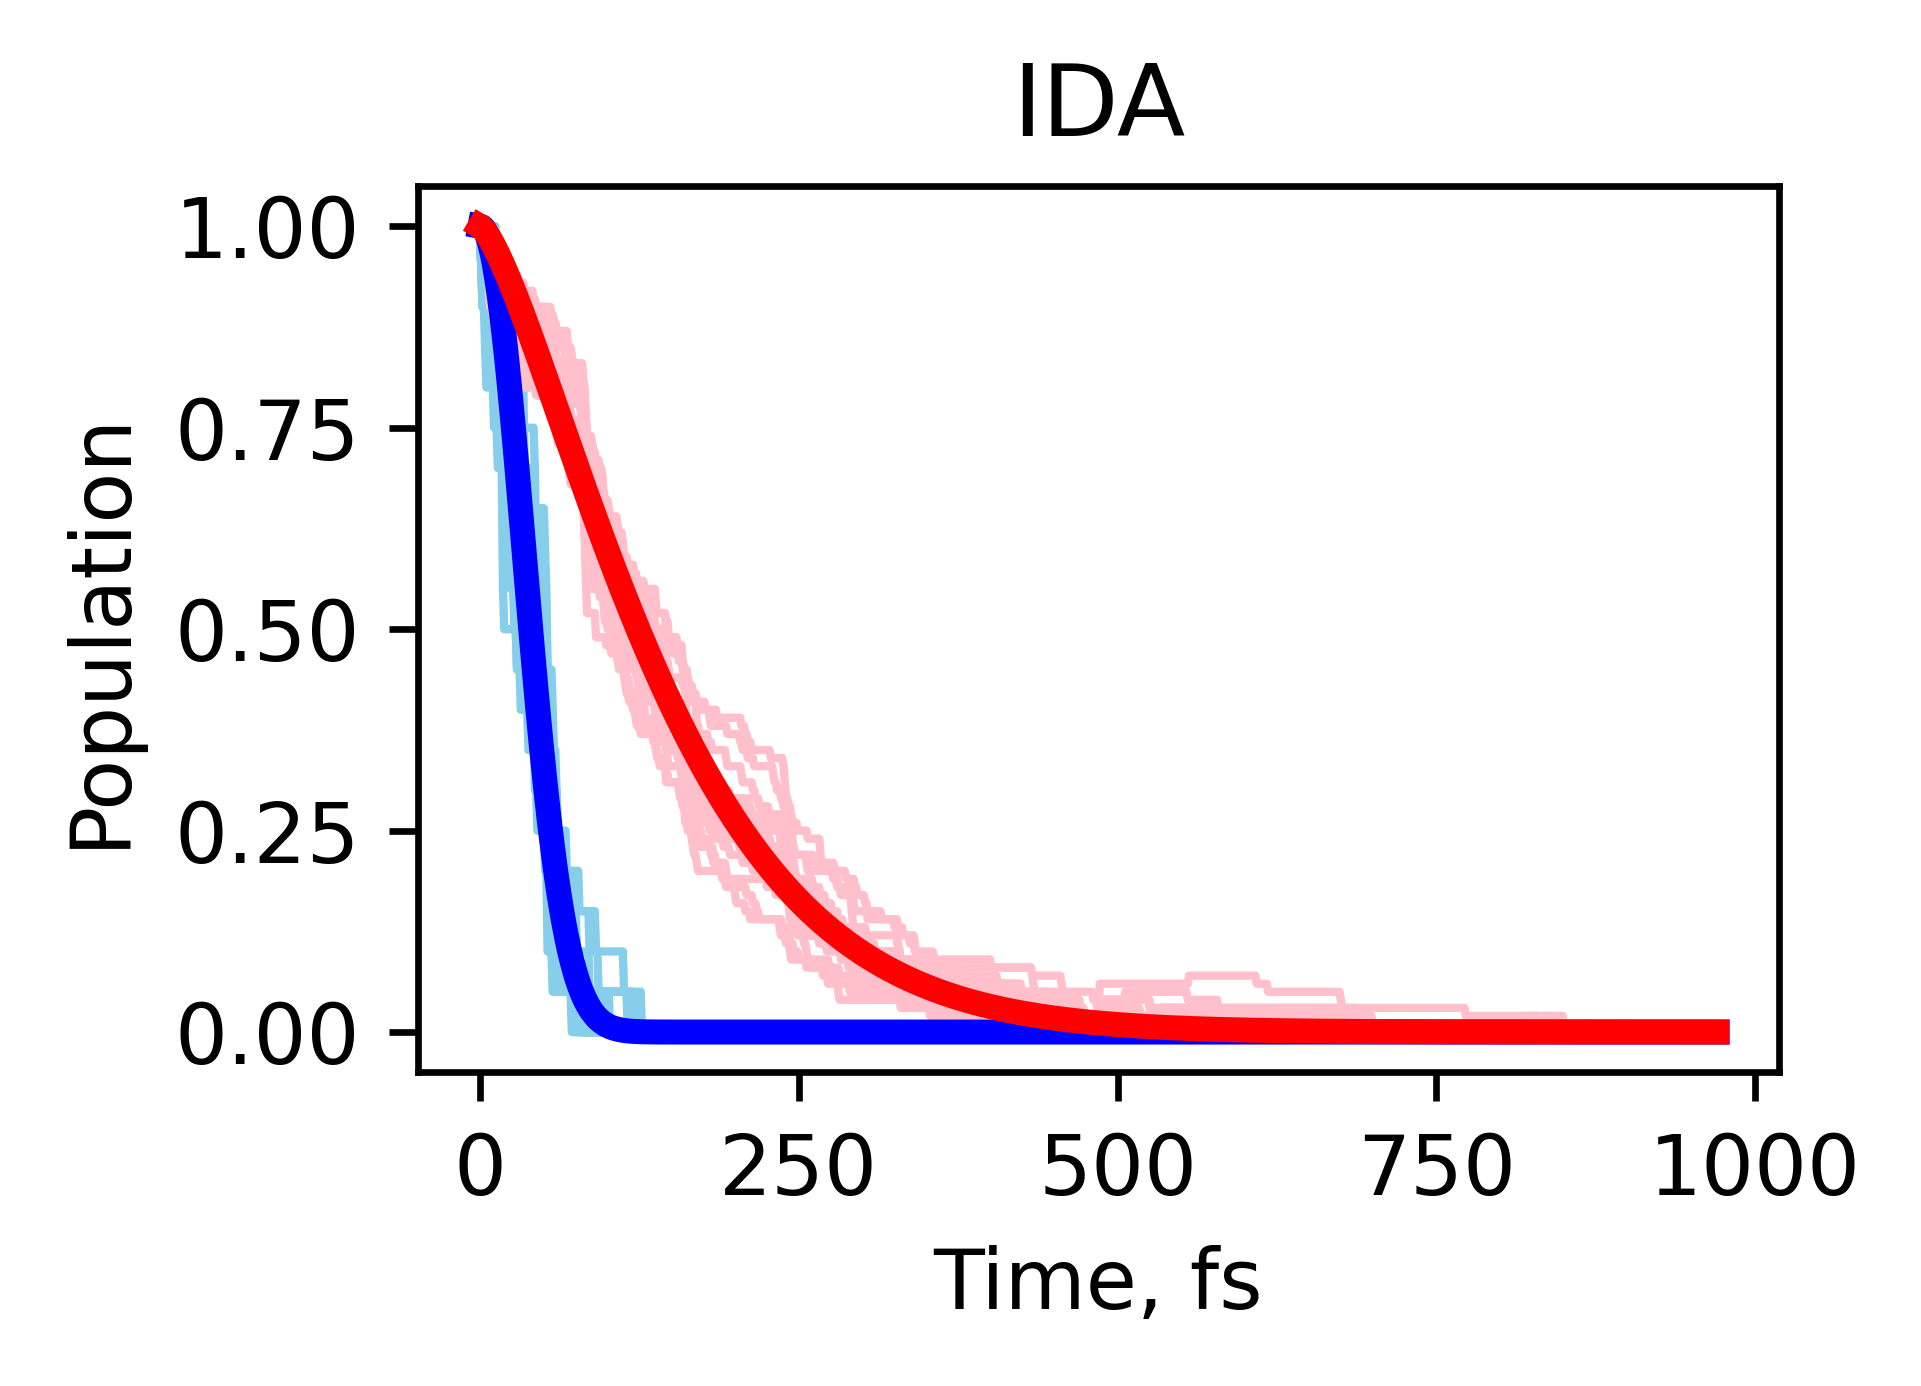

------------mSDM----------
Folder = ./namd_regular/_start_s10_mSDM_batch0
tau: 48.36651139693404  beta: 1.9030213614310298  R2: 0.9942168783751747
Folder = ./namd_regular/_start_s10_mSDM_batch2
tau: 46.409193109474145  beta: 1.9907128503667215  R2: 0.9883110475863638
Folder = ./namd_regular/_start_s10_mSDM_batch4
tau: 47.039860718413664  beta: 1.4799830404076977  R2: 0.9873674895897265
Folder = ./namd_regular/_start_s10_mSDM_batch6
tau: 54.13428386117116  beta: 2.128034914157209  R2: 0.9910162125150036
Folder = ./namd_regular/_start_s10_mSDM_batch1
tau: 42.46246464224299  beta: 1.8156192570627039  R2: 0.9904078887223454
Folder = ./namd_regular/_start_s10_mSDM_batch3
tau: 41.83577244243792  beta: 2.0769358761710945  R2: 0.9904174527134338
Folder = ./namd_regular/_start_s10_mSDM_batch5
tau: 43.44490189692257  beta: 1.5864237115739879  R2: 0.9907764167079003
Folder = ./namd_regular/_start_s10_mSDM_batch7
tau: 58.31853038709267  beta: 1.7793025382826178  R2: 0.9760846034224597
Folder = ./n

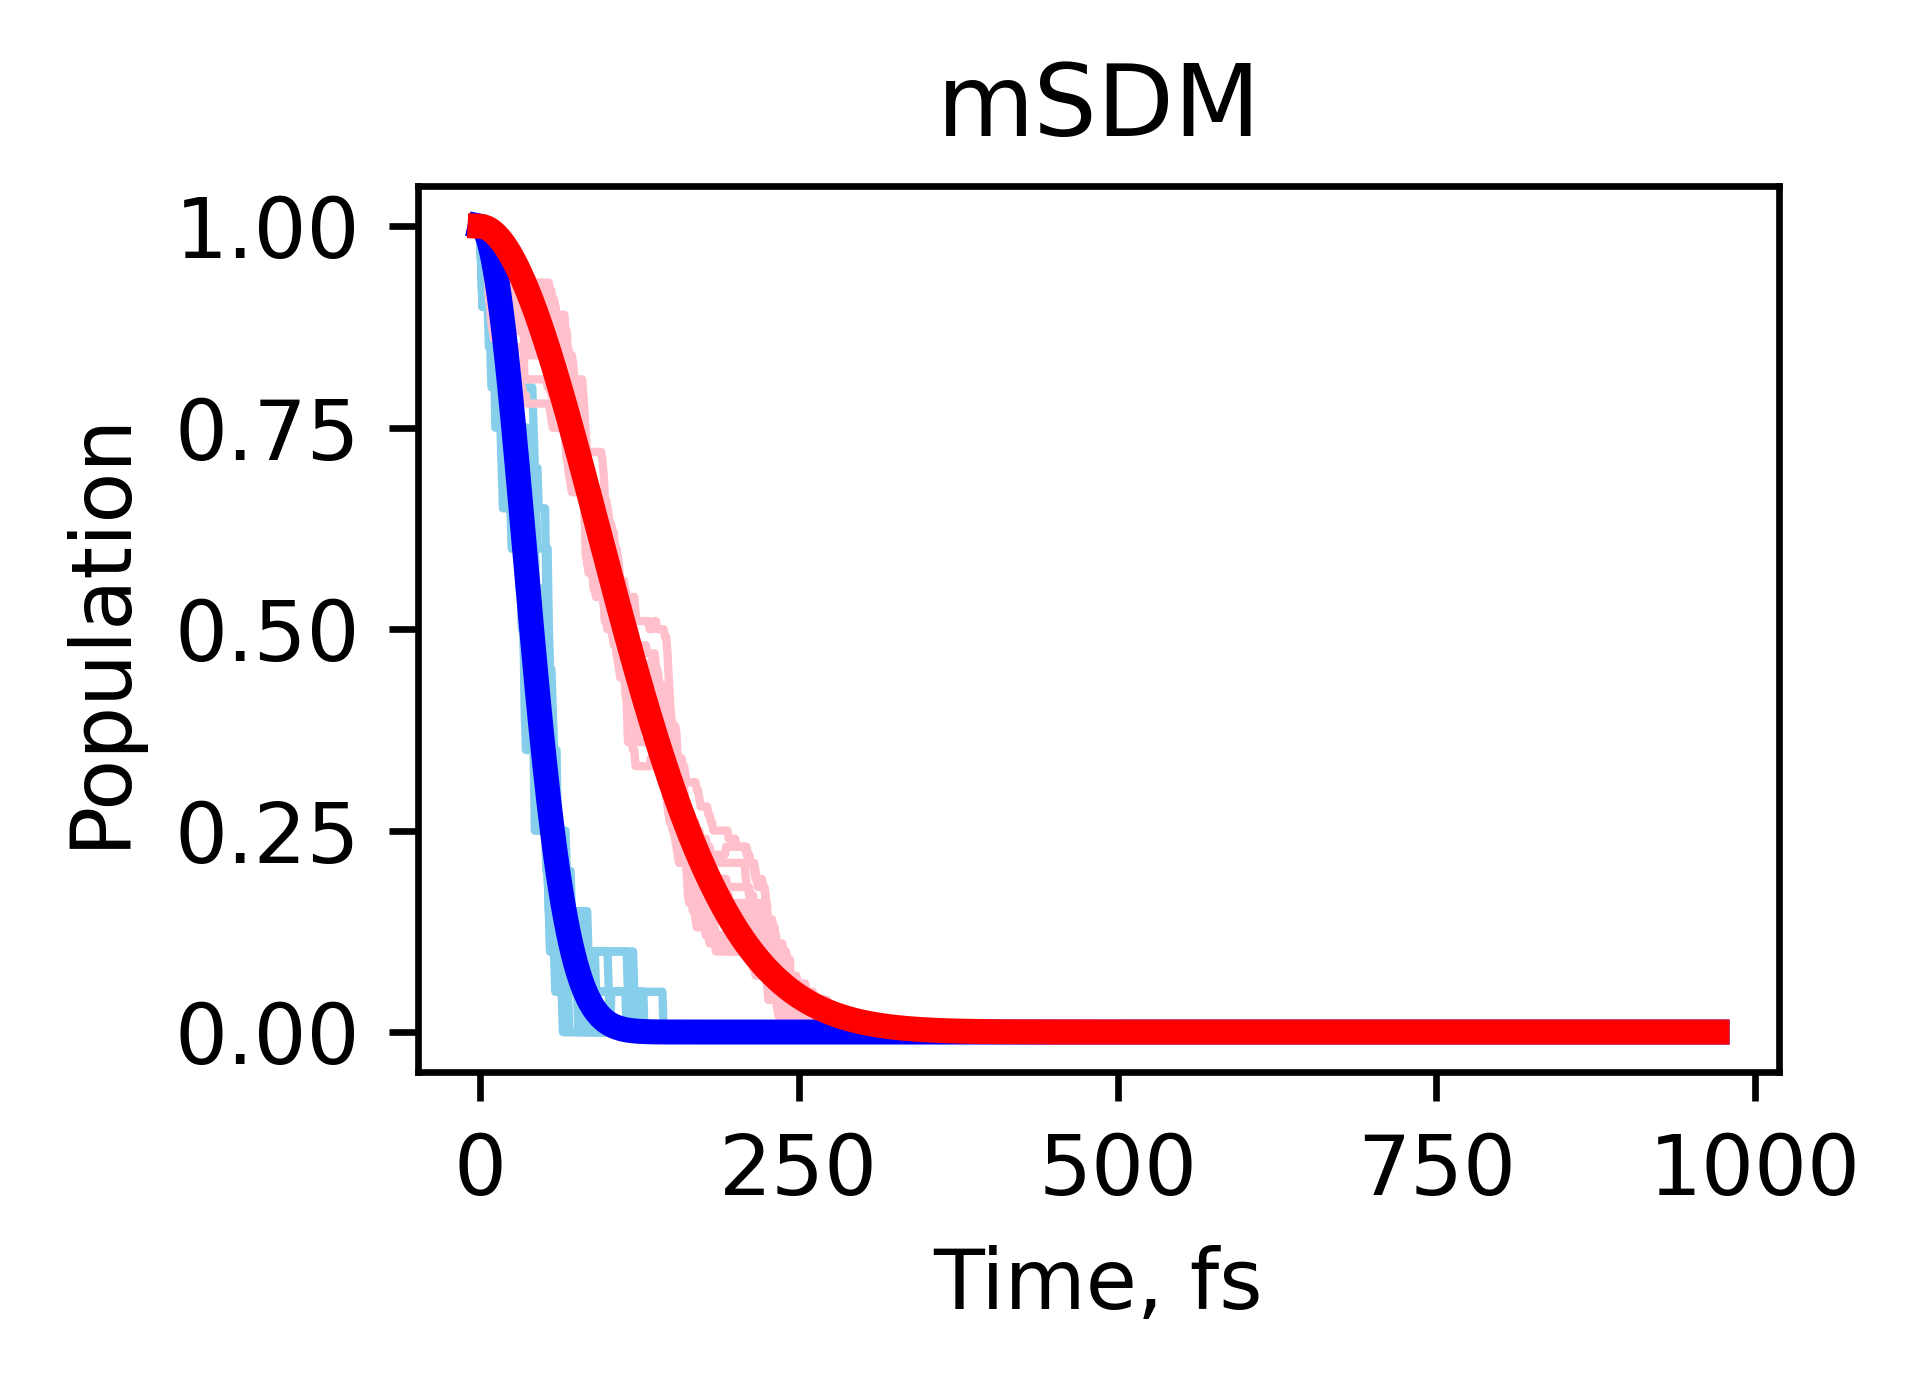

In [6]:
%matplotlib inline
#notebook
#figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=300, edgecolor='black', frameon=True)        

def stretched_compressed(t, tau, beta):
    return np.exp( -np.power(( t/tau ),beta) )

for c, scheme in enumerate(['FSSH', 'IDA','mSDM']):
    figure = plt.figure(num=None, figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)
    print(F'------------{scheme}----------')
    #plt.subplot(1,2,c+1)
    folders = glob.glob(F'./namd_regular/_start_s10_{scheme}_batch*', recursive = True)
    taus = []
    betas = []
    
    for folder in folders:
        
        print("Folder =", folder)
        sh_pop = np.loadtxt(folder+'/SH_pop.txt')
        sh_pop_hot_state = sh_pop[:,10]
        md_time = np.arange(0, sh_pop_hot_state.shape[0], 1.0)
        popt, pcov = curve_fit( stretched_compressed, md_time, sh_pop_hot_state, 
                                   bounds=([0.0, 0.0],[np.inf, np.inf]))
        tau, beta = popt
        # Computing the R-squared
        residuals  = sh_pop_hot_state - stretched_compressed(md_time, *popt)
        ss_res     = np.sum(residuals**2)
        ss_tot     = np.sum((sh_pop_hot_state - np.mean(sh_pop_hot_state))**2)
        r_squared  = 1.0 - (ss_res / ss_tot)
        print('tau:', tau, ' beta:', beta,' R2:', r_squared)
        
        if r_squared>0.01:
            taus.append(tau)
            betas.append(beta)
            plt.plot(md_time, sh_pop_hot_state,  linewidth=1, color = "skyblue")
            
    ave_tau = np.average(np.array(taus))
    ave_beta = np.average(np.array(betas))
    # Compute the erro bars
    # The confidence interval
    Z = 1.96
    N = len(taus)
    s = np.std(np.array(taus))
    error_bar = Z*s/np.sqrt(N)
    
######################################################################################################################        
    
    
    folders2 = glob.glob(F'./../17-mehr2-many-body/namd_regular/_start_s10_{scheme}_batch*', recursive = True)
    taus2 = []
    betas2 = []    
    for folder in folders2:
        
        print("Folder =", folder)
        sh_pop = np.loadtxt(folder+'/SH_pop.txt')
        sh_pop_hot_state = sh_pop[:,10]
        md_time2 = np.arange(0, sh_pop_hot_state.shape[0], 1.0)
        popt, pcov = curve_fit( stretched_compressed, md_time, sh_pop_hot_state, 
                                   bounds=([0.0, 0.0],[np.inf, np.inf]))
        tau, beta = popt
        # Computing the R-squared
        residuals  = sh_pop_hot_state - stretched_compressed(md_time, *popt)
        ss_res     = np.sum(residuals**2)
        ss_tot     = np.sum((sh_pop_hot_state - np.mean(sh_pop_hot_state))**2)
        r_squared  = 1.0 - (ss_res / ss_tot)
        print('tau:', tau, ' beta:', beta,' R2:', r_squared)
        
        if r_squared>0.01:
            taus2.append(tau)
            betas2.append(beta)
            plt.plot(md_time2, sh_pop_hot_state,  linewidth=1, color = "pink")
            
    ave_tau2 = np.average(np.array(taus2))
    ave_beta2 = np.average(np.array(betas2))
    # Compute the erro bars
    # The confidence interval
    Z = 1.96
    N = len(taus2)
    s = np.std(np.array(taus2))
    error_bar = Z*s/np.sqrt(N)
    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@2    
    
    print(F'The timescales: {ave_tau}+-{error_bar} average over {len(taus)} samples')
    # Plot average fit
    #plt.plot(md_time, stretched_compressed(md_time, ave_tau-error_bar, ave_beta), ls='--',linewidth=3, color='red')
    plt.plot(md_time, stretched_compressed(md_time, ave_tau,           ave_beta), ls='-',  linewidth=3, color='blue')
    plt.plot(md_time2, stretched_compressed(md_time2, ave_tau2,           ave_beta2), ls='-',  linewidth=3, color='red')

    #plt.plot(md_time, stretched_compressed(md_time, ave_tau+error_bar, ave_beta), ls='--', linewidth=3, color='red')
    
    plt.title(scheme)
    plt.xlabel('Time, fs')
    plt.ylabel('Population')
    plt.tight_layout()
    plt.savefig(F'{scheme}.png', dpi=600)
    plt.show() 